In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_similarity_score,plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.csv",header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
headers = ["sepal_len","sepal_wid","petal_len","petal_wid","class"]
df.columns = headers
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
unique_class = list(df["class"].unique())
unique_class

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [10]:
for index,name in enumerate(unique_class):
    df.loc[df["class"] == name,"class"] = index+1
    
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
list(df["class"].unique())

[1, 2, 3]

In [12]:
X = df.iloc[:,:4]
Y = df.iloc[:,-1]
Y = Y.astype(int)
X.head()

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df.isnull().count()

sepal_len    150
sepal_wid    150
petal_len    150
petal_wid    150
class        150
dtype: int64

In [14]:
X.shape

(150, 4)

In [15]:
#feature scaling
sc = StandardScaler()
sc.fit_transform(X)
X

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
#splitting into training and testing set
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

In [17]:
xtrain.shape

(120, 4)

In [18]:
#classify using logistic regression
lr = LogisticRegression(max_iter = 300)
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


1.0

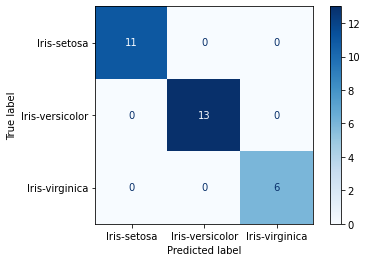

In [25]:
disp = plot_confusion_matrix(lr, xtest, ytest,
                                 display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                                 cmap=plt.cm.Blues)

In [26]:
#classify using naive bayes
nb = GaussianNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9666666666666667

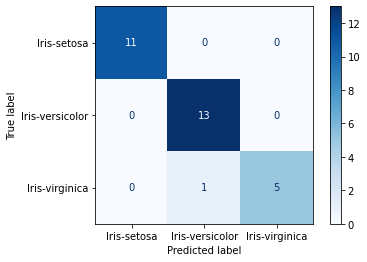

In [27]:
disp = plot_confusion_matrix(nb, xtest, ytest,
                                 display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                                 cmap=plt.cm.Blues)

In [33]:
#classify using KNN
knn = KNeighborsClassifier(n_neighbors = 7,p=2)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


1.0

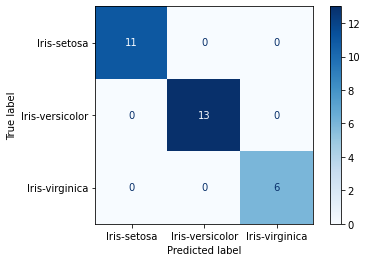

In [34]:
disp = plot_confusion_matrix(knn, xtest, ytest,
                                 display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                                 cmap=plt.cm.Blues)